In [1]:
import pandas as pd
from scipy import stats
import scipy.stats as sc
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
import heapq

import sys
sys.path.append('../script')
import common_function as CF

In [2]:
#path for summary of surface charge
reference_surface_charge_path='../data/json/reference_surface_charge.json'
isoform_surface_charge_path='../data/json/isoform_surface_charge.json'
difference_surface_charge_path='../data/json/difference_surface_charge.json'
#path for as event
plddt_IDR_isoform_path = '../data/json/plddt_IDR_isoform.json'
plddt_IDR_reference_path = '../data/json/plddt_IDR_reference.json'
as_event_path='../data/json/as_event.json'
reference_summary_path = '../data/csv/summary_reference.csv'
isoform_summary_path = '../data/csv/summary_isoform.csv'

In [3]:
def load_file_json(path):
    with open(path,'r') as load_f:
        file=json.load(load_f)
    return file

<span style="font-size: 20px;">Plot surface charge distribution: </span>

In [4]:
isoform_surface_charge=load_file_json(isoform_surface_charge_path)
reference_surface_charge=load_file_json(reference_surface_charge_path)
difference_surface_charge=load_file_json(difference_surface_charge_path)
plddt_IDR_isoform = load_file_json(plddt_IDR_isoform_path)
plddt_IDR_reference = load_file_json(plddt_IDR_reference_path)
as_event=load_file_json(as_event_path)
reference_summary=pd.read_csv(reference_summary_path)
isoform_summary=pd.read_csv(isoform_summary_path)

In [5]:
reference_high_confident = reference_summary[reference_summary['plddt']>=70.0]
isoform_high_confident = isoform_summary[isoform_summary['plddt']>=70.0]

In [6]:
reference_high = reference_summary[reference_summary['plddt']>=90.0]
isoform_high = isoform_summary[isoform_summary['plddt']>=90.0]

In [24]:
#select only high and confident structures
#isoform_surface_charge,reference_surface_charge,difference_surface_charge=CF.combine_quality_metric(reference_high_confident,isoform_high_confident,reference_surface_charge,isoform_surface_charge,difference_surface_charge)

In [13]:
#high and confident
charge_isoform,charge_reference,charge_difference=CF.combine_quality_metric(reference_high_confident,isoform_high_confident,reference_surface_charge,isoform_surface_charge,difference_surface_charge)
isoform_charge_list=list(charge_isoform.values())
reference_charge_list=list(charge_reference.values())
statistic, p_value = stats.mannwhitneyu(isoform_charge_list,reference_charge_list)

In [14]:
#high and confident
print('high and confident median charge for isoform:',np.median(isoform_charge_list))

#high and confident
print('high and confident median charge for reference:',np.median(reference_charge_list))

#high and confident
print('high and confident pvalue:',p_value)

high and confident median charge for isoform: 1.0
high and confident median charge for reference: 0.9999999999999978
high and confident pvalue: 0.3038219735024714


In [17]:
#high only
charge_isoform,charge_reference,charge_difference=CF.combine_quality_metric(reference_high,isoform_high,reference_surface_charge,isoform_surface_charge,difference_surface_charge)
isoform_charge_list=list(charge_isoform.values())
reference_charge_list=list(charge_reference.values())
statistic, p_value = stats.mannwhitneyu(isoform_charge_list,reference_charge_list)

In [18]:
#high only
print('high median charge for isoform:',np.median(isoform_charge_list))

#high only
print('high median charge for reference:',np.median(reference_charge_list))

#high only
print('high pvalue:',p_value)

high median charge for isoform: 0.0
high median charge for reference: 0.9999999999999969
high pvalue: 0.037178443442739253


In [28]:
#plot distribtion
def plot_distribtion_box(isoform_charge,reference_charge,outliers = True, name=None):
    plot_df=pd.DataFrame(columns=['Class','Surface charge'])
    index=0
    surface_charge=[]
    for charge in list(isoform_charge.values()):
        surface_charge.append(charge)
    for charge in list(reference_charge.values()):
        surface_charge.append(charge)
    plot_df['Class']=['Isoform']*len(isoform_charge)+['Reference']*len(reference_charge)
    plot_df['Surface charge']=surface_charge
    plt.figure(figsize=(2,4))
    box_colors = ['#F3BF70','#25D9F5']
    if outliers==False:
        sns.boxplot(x="Class",y="Surface charge",data=plot_df,palette="Set3",showfliers = False,notch=True)
    else:  
        sns.boxplot(x="Class",y="Surface charge",data=plot_df,flierprops = {'marker':'o','markerfacecolor':'black','markersize': 1},notch=True,width=0.8,palette=box_colors,order=['Reference','Isoform'])
    plt.xlabel('')    
    plt.ylabel("Surface charge",fontsize=12)
    plt.xticks(fontsize=12)
    #plt.yticks(range(-60, 45, 30),fontsize=12)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.savefig(name+'_distribution.png',dpi=600,bbox_inches='tight')
    plt.show()
    return plot_df

In [10]:
#select only high and confident structures and also 0 IDR stuructres
plddt_IDR_isoform_list=[]
for i in plddt_IDR_isoform:
    reference = i.split('-')[0]
    if plddt_IDR_isoform[i] == [] and reference in plddt_IDR_reference.keys():
        if plddt_IDR_reference[reference]==[]:
            plddt_IDR_isoform_list.append(i)

plddt_IDR_reference_list = list(set([i.split('-')[0] for i in plddt_IDR_isoform_list]))


plddt_IDR_reference_charge = {}
plddt_IDR_isoform_charge = {}
plddt_IDR_isoform_charge_diff = {}

for isoform in plddt_IDR_isoform_list:
    if isoform in charge_difference.keys():
        reference = isoform.split('-')[0]
        plddt_IDR_isoform_charge[isoform] = charge_isoform[isoform]
        plddt_IDR_reference_charge[reference] = charge_reference[reference]
        plddt_IDR_isoform_charge_diff[isoform] = charge_difference[isoform]
    else:
        print(isoform)

In [11]:
len(charge_isoform)

7024

/tmp/ipykernel_2775640/2851790841.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class",y="Surface charge",data=plot_df,flierprops = {'marker':'o','markerfacecolor':'black','markersize': 1},notch=True,width=0.8,palette=box_colors,order=['Reference','Isoform'])


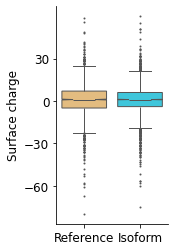

,Class,Surface charge
0,Isoform,5.0
1,Isoform,4.0
2,Isoform,-3.0
3,Isoform,-7.0
4,Isoform,14.0
...,...,...
11063,Reference,3.0
11064,Reference,7.0
11065,Reference,-2.0
11066,Reference,6.0


In [17]:
plot_distribtion_box(charge_isoform,charge_reference)

In [20]:
#plot_distribtion_box(plddt_IDR_isoform_charge,plddt_IDR_reference_charge)

In [29]:
#select the isoforms with alternative splicing types
#isoform_charge_type_IDR,difference_charge_type_IDR=CF.combine_quality_type(plddt_IDR_isoform_charge,plddt_IDR_isoform_charge_diff,as_event)

In [20]:
#select the isoforms with alternative splicing types
isoform_charge_type,difference_charge_type=CF.combine_quality_type(charge_isoform,charge_difference,as_event)

In [21]:
difference_charge_list = []
for isoform in difference_charge_type.keys():
    difference_charge_list.append(difference_charge_type[isoform][0])

In [36]:
def plot_difference_outlier_box(difference_charge_type,name=None):
    difference_charge_type_new={}
    for isoform in difference_charge_type.keys():
        difference_charge_type_new[isoform]=difference_charge_type[isoform][0]
    plot_df = pd.DataFrame()
    plot_df['Isoform']=list(difference_charge_type_new.keys())
    plot_df['Surface charge difference']=list(difference_charge_type_new.values())
    plot_df['Class']='Isoform'
    fig = plt.figure(figsize=(2,4))
    box_colors = ['#25D9F5']
    sns.boxplot(data=plot_df, x='Class', y='Surface charge difference',flierprops = {'marker':'o','markerfacecolor':'black','markersize': 1},notch=True,width=0.8,palette=box_colors)
    plt.xlabel('')
    plt.xticks(fontsize=12)
    #plt.yticks(range(-25, 30, 10),fontsize=12)
    plt.ylabel("Surface charge difference",fontsize=12)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.savefig(name+'_difference.png',dpi=600,bbox_inches='tight')
    plt.show()
    return plot_df

In [16]:
#high and confident
print('median of high and confident difference',np.median(difference_charge_list))

median of high and confident difference 1.7763568394002505e-15


In [22]:
#high
print('median of high difference',np.median(difference_charge_list))

median of high difference -0.9999999999999944


/tmp/ipykernel_3290511/1110213021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='Class', y='Surface charge difference',flierprops = {'marker':'o','markerfacecolor':'black','markersize': 1},notch=True,width=0.8,palette=box_colors)


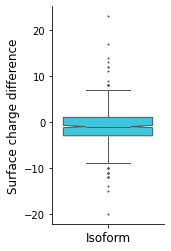

,Isoform,Surface charge difference,Class
0,O76075-2,-9.0,Isoform
1,Q13303-2,-3.0,Isoform
2,Q13303-4,-6.0,Isoform
3,P30038-3,1.0,Isoform
4,P30038-2,-10.0,Isoform
...,...,...,...
637,P49459-3,-1.0,Isoform
638,Q9ULC4-3,0.0,Isoform
639,P22304-2,13.0,Isoform
640,Q8TE69-2,2.0,Isoform


In [28]:
plot_difference_outlier_box(difference_charge_type)

In [24]:
#plot_df=plot_difference_outlier_box(difference_charge_type_IDR)

<span style="font-size: 20px;">Select outlier examples and plot the alternative splicing types in surface charge outliers: </span>

In [16]:
def calculate_outliters_charge(charge_difference_dic):
    charge_difference_list=[]
    for charge in charge_difference_dic.values():
        charge_difference_list.append(charge[0])
    Q1=np.percentile(charge_difference_list,25)
    Q3=np.percentile(charge_difference_list,75)
    IQR=1.5*(Q3-Q1)
    upper_bound=Q3+IQR
    lower_bound=Q1-IQR
    lower_list=[]
    upper_list=[]
    for k,v in charge_difference_dic.items():
        if v[0]>=upper_bound and type(v[1])==list:
            upper_list.append(k)
        elif v[0]<=lower_bound and type(v[1])==list:
            lower_list.append(k)
        else:
            continue
    return upper_list,lower_list,upper_bound,lower_bound

In [31]:
upper_list,lower_list,upper_bound,lower_bound=calculate_outliters_charge(difference_charge_type)

In [37]:
#upper_list,lower_list,upper_bound,lower_bound=calculate_outliters_charge(difference_charge_type_IDR)

In [48]:
#replace the name for the plot
def replace_as_abb_dic(plot_dic):
    new_plot_dic={}
    as_name_dic={'exon_skipping':'ES',
                 'alternative_donor_site':'ADS',
                 'alternative_acceptor_site':'AAS',
                 'mutually_exclusive_exon':'MXE',
                 'intron_retention':'IR',
                 'alternative_first_exon':'AFE',
                 'alternative_last_exon':'ALE',
                 'mutually_exclusive_exon-alternative_first_exon':'MXE-AFE',
                 'mutually_exclusive_exon-alternative_last_exon':'MXE-ALE'}
    for key in plot_dic.keys():
        new_plot_dic[as_name_dic[key]]=plot_dic[key]
    return new_plot_dic

In [49]:
def get_feature(charge_list,charge_dic):
    count_feature={}
    for isoform in charge_list:
        for feature in charge_dic[isoform][1]:
            if feature in count_feature.keys():
                count_feature[feature]+=1
            else:
                count_feature[feature]=1
    return count_feature

In [35]:
feature_upper=get_feature(upper_list,difference_charge_type)
feature_lower=get_feature(lower_list,difference_charge_type)

In [40]:
#feature_upper_IDR=get_feature(upper_list,difference_charge_type_IDR)
#feature_lower_IDR=get_feature(lower_list,difference_charge_type_IDR)

In [62]:
def plot_outlier_event_frequent_pair(positive_outlier,negative_outlier,threshold=5,name=None):
    selected_positive_outlier_pair = heapq.nlargest(threshold, positive_outlier.items(), key=lambda item: item[1])
    selected_negative_outlier_pair = heapq.nlargest(threshold, negative_outlier.items(), key=lambda item: item[1])
    sorted_positive_outlier = dict(selected_positive_outlier_pair)
    sorted_negative_outlier = dict(selected_negative_outlier_pair)
    sorted_positive_outlier = replace_as_abb_dic(sorted_positive_outlier)
    sorted_negative_outlier = replace_as_abb_dic(sorted_negative_outlier)
    
    as_list=list(sorted_positive_outlier.keys())
    positive_outlier_list=list(sorted_positive_outlier.values())
    negative_outlier_list=list(sorted_negative_outlier.values())

    bar_width = 0.4
    bar1_positions = range(len(as_list))
    bar2_positions = [x + bar_width for x in bar1_positions]
 
    plt.bar(bar1_positions, positive_outlier_list, width=bar_width, label='positive',color='#000099')
    plt.bar(bar2_positions, negative_outlier_list, width=bar_width, label='negative',color='#FF0000')
    
    plt.xticks([x + bar_width/2 for x in bar1_positions], as_list,fontsize=14)
    plt.legend(fontsize=12)
    plt.xlabel('AS event type',fontsize=14)
    plt.ylabel('AS event number',fontsize=14)
    #plt.yticks(range(0, 10, 1),fontsize=14)
    plt.savefig(name+'_type.png',dpi=600,bbox_inches='tight')
    plt.show()
    return True


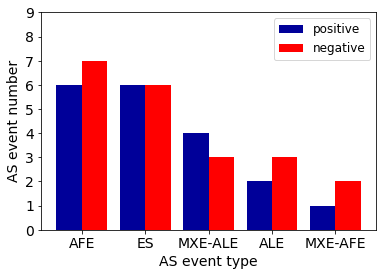

True

In [43]:
plot_outlier_event_frequent_pair(feature_upper,feature_lower)

<span style="font-size: 20px;">Calculate outlier examples only for non-IDR non-extended helices dataset: </span>

In [5]:
non_HE_isoform_path='../data/txt/non_HE_isoform.txt'

In [6]:
non_HE_isoform_list = []
with open(non_HE_isoform_path,'r') as f:
    for line in f:
        line = line.replace('\n','')
        non_HE_isoform_list.append(line)
f.close()

In [7]:
non_HE_reference_list = []
for isoform in non_HE_isoform_list:
    non_HE_reference_list.append(isoform.split('-')[0])
non_HE_reference_list = list(set(non_HE_reference_list))

In [8]:
non_HE_isoform_summary = isoform_summary[isoform_summary['isoform'].isin(non_HE_isoform_list)]
non_HE_isoform_summary = non_HE_isoform_summary.reset_index(drop=True)

non_HE_reference_summary = reference_summary[reference_summary['reference'].isin(non_HE_reference_list)]
non_HE_reference_summary = non_HE_reference_summary.reset_index(drop=True)

In [9]:
charge_non_HE_isoform,charge_non_HE_reference,charge_non_HE_difference=CF.combine_quality_metric(non_HE_reference_summary,non_HE_isoform_summary,reference_surface_charge,isoform_surface_charge,difference_surface_charge)

In [10]:
isoform_charge_non_HE_list=list(charge_non_HE_isoform.values())
reference_charge_non_HE_list=list(charge_non_HE_reference.values())
statistic, p_value = stats.mannwhitneyu(isoform_charge_non_HE_list,reference_charge_non_HE_list)

In [12]:
#non HE
print('median charge for isoforms with no isolated helices and IDRs:',np.median(isoform_charge_non_HE_list))
print(len(isoform_charge_non_HE_list))
#non HE
print('median charge for corresponding references',np.median(reference_charge_non_HE_list))
print(len(reference_charge_non_HE_list))

#non HE
print('pvalue:',p_value)

median charge for isoforms with no isolated helices and IDRs: 0.0
1359
median charge for corresponding references -1.1102230246251563e-15
975
pvalue: 0.5768731410449297


/tmp/ipykernel_2775640/3580961959.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class",y="Surface charge",data=plot_df,flierprops = {'marker':'o','markerfacecolor':'black','markersize': 1},notch=True,width=0.8,palette=box_colors,order=['Reference','Isoform'])


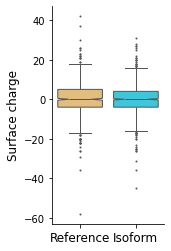

,Class,Surface charge
0,Isoform,-7.000000e+00
1,Isoform,-9.000000e+00
2,Isoform,-3.000000e+00
3,Isoform,1.300000e+01
4,Isoform,-4.000000e+00
...,...,...
2329,Reference,5.000000e+00
2330,Reference,-4.773959e-15
2331,Reference,-5.000000e+00
2332,Reference,-3.000000e+00


In [29]:
plot_distribtion_box(charge_non_HE_isoform,charge_non_HE_reference,name='charge_non_HE')

In [14]:
#select the isoforms with alternative splicing types
isoform_charge_non_HE_type,difference_charge_non_HE_type=CF.combine_quality_type(charge_non_HE_isoform,charge_non_HE_difference,as_event)

In [15]:
len(isoform_charge_non_HE_type)

1012

/tmp/ipykernel_2775640/817408782.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='Class', y='Surface charge difference',flierprops = {'marker':'o','markerfacecolor':'black','markersize': 1},notch=True,width=0.8,palette=box_colors)


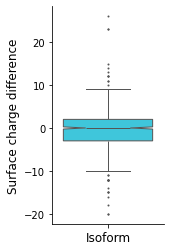

,Isoform,Surface charge difference,Class
0,Q8TBF2-2,6.0,Isoform
1,O76075-2,-9.0,Isoform
2,P30038-3,1.0,Isoform
3,P30038-2,-10.0,Isoform
4,P05186-2,-5.0,Isoform
...,...,...,...
1007,O60880-3,-4.0,Isoform
1008,O60880-6,-4.0,Isoform
1009,Q8TE69-2,2.0,Isoform
1010,Q8N1B3-2,2.0,Isoform


In [37]:
plot_difference_outlier_box(difference_charge_non_HE_type,name='charge_non_HE')

In [16]:
difference_non_HE_charge_list = []
for isoform in difference_charge_non_HE_type.keys():
    difference_non_HE_charge_list.append(difference_charge_non_HE_type[isoform][0])

In [40]:
print('median of non HE',np.median(difference_non_HE_charge_list))

median of non HE 0.0


In [43]:
upper_non_HE_list,lower_non_HE_list,upper_non_HE_bound,lower_non_HE_bound = calculate_outliters_charge(difference_charge_non_HE_type)

In [47]:
lower_non_HE_bound

-10.499999999999986

In [11]:
non_HE_Q1=np.percentile(list(charge_non_HE_difference.values()),25)
non_HE_Q3=np.percentile(list(charge_non_HE_difference.values()),75)
non_HE_IQR=1.5*(non_HE_Q3-non_HE_Q1)
non_HE_upper_bound=non_HE_Q3+non_HE_IQR
non_HE_lower_bound=non_HE_Q1-non_HE_IQR

non_HE_upper_list=[]
non_HE_lower_list=[]
for k,v in charge_non_HE_difference.items():
    if v>=non_HE_upper_bound:
        non_HE_upper_list.append(k)
    elif v<=non_HE_lower_bound:
        non_HE_lower_list.append(k)
    else:
        continue

In [5]:
RCL1_reference_seq='MATQAHSLSYAGCNFLRQRLVLSTLSGRPVKIRKIRARDDNPGLRDFEASFIRLLDKITNGSRIEINQTGTTLYYQPGLLYGGSVEHDCSVLRGIGYYLESLLCLAPFMKHPLKIVLRGVTNDQVDPSVDVLKATALPLLKQFGIDGESFELKIVRRGMPPGGGGEVVFSCPVRKVLKPIQLTDPGKIKRIRGMAYSVRVSPQMANRIVDSARSILNKFIPDIYIYTDHMKGVNSGKSPGFGLSLVAETTSGTFLSAELASNPQGQGAAVLPEDLGRNCARLLLEEIYRGGCVDSTNQSLALLLMTLGQQDVSKVLLGPLSPYTIEFLRHLKSFFQIMFKIETKPCGEELKGGDKVLMTCVGIGFSNLSKTLK'

In [2]:
RCL1_isoform_seq='MTSLTPGCRYSVRVSPQMANRIVDSARSILNKFIPDIYIYTDHMKGVNSGKSPGFGLSLVAETTSGTFLSAELASNPQGQGAAVLPEDLGRNCARLLLEEIYRGGCVDSTNQSLALLLMTLGQQDVSKVLLGPLSPYTIEFLRHLKSFFQIMFKIETKPCGEELKGGDKVLMTCVGIGFSNLSKTLK'

In [8]:
RCL1_reference_seq.count('E')

17

In [10]:
RCL1_isoform_seq.count('E')

9

In [12]:
#structure looks fine: Q9UIR0-3,Q6P3W2-2,Q16539-5(*)
#structure different: Q6QHF9-6,Q7Z4H3-3,Q9C0B1-2,O60671-3,Q9C0B1-4,Q9C0B1-3,Q3I5F7-2,Q8TB03-3,O95278-6,Q9H867-1,Q8IUX4-2,Q9BXD5-5(*)
#loop: O14958-2,Q9NZQ9-2,Q8N3F0-2,P19883-2,Q6UXH1-3
#helix: Q9Y2B0-2,Q9NUL5-3
#repeat: Q92496-3,Q9UIR0-5,P61962-2(*)
non_HE_upper_list

['Q9UIR0-3',
 'Q6QHF9-6',
 'Q6P3W2-2',
 'O14958-2',
 'Q96DC9-2',
 'Q9NZQ9-2',
 'Q7Z4H3-3',
 'Q9C0B1-2',
 'Q8N3F0-2',
 'O60671-3',
 'Q9Y2B0-2',
 'Q9NUL5-3',
 'Q9C0B1-4',
 'P19883-2',
 'Q9C0B1-3',
 'Q92496-3',
 'Q3I5F7-2',
 'Q8TB03-3',
 'Q9UIR0-5',
 'Q6UXH1-3',
 'Q16539-5',
 'O95278-6',
 'Q9H867-1',
 'Q8IUX4-2',
 'P61962-2',
 'Q9BXD5-5']

In [13]:
#structure looks fine: Q9NZK5-2,Q9H7B4-2,P22307-3,Q16773-3,P61313-2,Q9H9T3-5,P36871-3
#structure different: O95498-5,Q92737-2,Q9NV06-2,P20718-3,Q9Y2P8-2(*),Q8NDZ4-2,Q8WZ79-2,Q6ZNC8-3,P46779-5
#repeat: P53677-2(*),Q5H9S7-2(*)
#helix: Q9BY64-2,Q9NYL4-2,P10747-5,P46779-4,Q8N4T4-3,Q9NRZ5-2,Q9Y6A2-3
#loop: Q8N688-2
non_HE_lower_list

['Q9NZK5-2',
 'O95498-5',
 'P53677-2',
 'Q92737-2',
 'Q9BY64-2',
 'Q9NYL4-2',
 'Q8N688-2',
 'Q5H9S7-2',
 'Q9H7B4-2',
 'P10747-5',
 'P46779-4',
 'Q9NV06-2',
 'Q8N4T4-3',
 'P22307-3',
 'Q16773-3',
 'P20718-3',
 'P61313-2',
 'Q9Y2P8-2',
 'Q8NDZ4-2',
 'Q9H9T3-5',
 'P36871-3',
 'Q8WZ79-2',
 'Q9NRZ5-2',
 'Q6ZNC8-3',
 'Q9Y6A2-3',
 'P46779-5']

In [53]:
feature_non_HE_upper=get_feature(upper_non_HE_list,difference_charge_non_HE_type)
feature_non_HE_lower=get_feature(lower_non_HE_list,difference_charge_non_HE_type)

In [58]:
feature_non_HE_upper

{'exon_skipping': 11,
 'alternative_last_exon': 6,
 'mutually_exclusive_exon-alternative_last_exon': 1,
 'alternative_donor_site': 1,
 'alternative_first_exon': 2,
 'mutually_exclusive_exon-alternative_first_exon': 1}

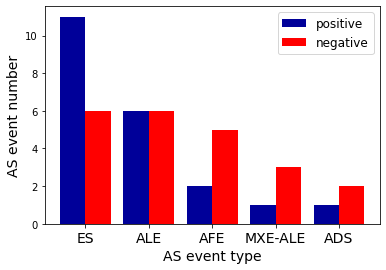

True

In [63]:
plot_outlier_event_frequent_pair(feature_non_HE_upper,feature_non_HE_lower,name='non_HE')